<a href="https://colab.research.google.com/github/rodrigovitorino137/alura_challenges_ds1/blob/main/Notebooks/semana2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font color='green'>**ALURA CHALLENGES**</font>

#<font color='green'>**SEMANA 2 - Análise Dos Dados**</font>

##<font color='green'>**Lendo os dados e fazendo uma analise preliminar dos dados**</font>

Primeiro vamos importar as bibliotecas necessárias.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib.ticker import FixedLocator, FixedFormatter

Vamos importar as cores que serão usadas.

In [9]:
# Definindo a paleta de cores
AZUL1, AZUL2, AZUL3, AZUL4, AZUL5 = '#03045e', '#0077b6', "#00b4d8", '#90e0ef', '#CDDBF3'
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5 = '#212529', '#495057', '#adb5bd', '#dee2e6', '#f8f9fa'
VERMELHO1, LARANJA1, AMARELO1, VERDE1, VERDE2 = '#e76f51', '#f4a261',	'#e9c46a', '#4c956c', '#2a9d8f'

Lendo os dados que foram limpos na semana 1.

In [10]:
url = 'https://raw.githubusercontent.com/rodrigovitorino137/alura_challenges_ds1/main/Dados/Telco_Customer_Churn_limpeza.csv'
df = pd.read_csv(url).drop('Unnamed: 0', axis = 1)
df.head()


,clienteID,Churn,genero,idoso,parceiro,dependentes,meses_contrato,serviço_telefônico,multiplas_linhas,serviço_internet,...,backup_online,proteção_dispositivos,suporte_tecnico,streaming_tv,streaming_filmes,contrato,faturamento_sem_papel,metodo_pagamento,custos_mensais,custos_totais
0,0002-ORFBO,Nao,Mulher,0,Sim,Sim,9,Sim,Nao,DSL,...,Sim,Nao,Sim,Sim,Nao,Um ano,Sim,Cheque enviado,65.6,593.30
1,0003-MKNFE,Nao,Homem,0,Nao,Nao,9,Sim,Sim,DSL,...,Nao,Nao,Nao,Nao,Sim,Mes-a-mes,Nao,Cheque enviado,59.9,542.40
2,0004-TLHLJ,Sim,Homem,0,Nao,Nao,4,Sim,Nao,Fibra optica,...,Nao,Sim,Nao,Nao,Nao,Mes-a-mes,Sim,Cheque eletronico,73.9,280.85
3,0011-IGKFF,Sim,Homem,1,Sim,Nao,13,Sim,Nao,Fibra optica,...,Sim,Sim,Nao,Sim,Sim,Mes-a-mes,Sim,Cheque eletronico,98.0,1237.85
4,0013-EXCHZ,Sim,Mulher,1,Sim,Nao,3,Sim,Nao,Fibra optica,...,Nao,Nao,Sim,Sim,Nao,Mes-a-mes,Sim,Cheque enviado,83.9,267.40


Analisando os tipos das variáveis.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   clienteID              7043 non-null   object 
 1   Churn                  7043 non-null   object 
 2   genero                 7043 non-null   object 
 3   idoso                  7043 non-null   int64  
 4   parceiro               7043 non-null   object 
 5   dependentes            7043 non-null   object 
 6   meses_contrato         7043 non-null   int64  
 7   serviço_telefônico     7043 non-null   object 
 8   multiplas_linhas       7043 non-null   object 
 9   serviço_internet       7043 non-null   object 
 10  segurança_online       7043 non-null   object 
 11  backup_online          7043 non-null   object 
 12  proteção_dispositivos  7043 non-null   object 
 13  suporte_tecnico        7043 non-null   object 
 14  streaming_tv           7043 non-null   object 
 15  stre

Usando o método **describe<font color='blue'>()</font>** para fazer uma analise preliminar.


In [12]:
df.describe()

,idoso,meses_contrato,custos_mensais,custos_totais
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.798992
std,0.368612,24.559481,30.090047,2266.730170
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


Com o **describe<font color='blue'>()</font>**  conseguimos perceber algumas coisas:


*   Existe mais jovens do que idosos no banco de dados.
*   Os meses de contrato e custos variam bastante.





Agora vamos analizar as variáveis do tipo objeto. Assim vamos conseguir ver os resultados que mais aparecem e suas frequências.

In [13]:
df.describe(include = 'object')

,clienteID,Churn,genero,parceiro,dependentes,serviço_telefônico,multiplas_linhas,serviço_internet,segurança_online,backup_online,proteção_dispositivos,suporte_tecnico,streaming_tv,streaming_filmes,contrato,faturamento_sem_papel,metodo_pagamento
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,0002-ORFBO,Nao,Homem,Nao,Nao,Sim,Nao,Fibra optica,Nao,Nao,Nao,Nao,Nao,Nao,Mes-a-mes,Sim,Cheque eletronico
freq,1,5174,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365


##<font color='green'>**Analisando graficamente as variáveis do tipo objeto**</font>

Temos muitas colunas do tipo objeto e o melhor jeito de analisar elas é com **gráficos de barras**.
Já que iremos usar bastante o mesmo tipo de gráfico,vamos fazer uma função para otimizar nosso trabalho.

In [14]:
def grafico_comparacao(col, title = None, offset =0, legenda = False):

  sns.set_theme(style = 'white')
  fig, ax = plt.subplots(figsize=(10,4))
  ax = sns.countplot(data = df, x = col, hue = 'Churn', palette = [AZUL3, 'red'])
  if legenda:
    ax.legend(title='Contrato', labels=['Ativo', 'Cancelado'], loc = (1, 0.8))
  ax.set_title(title, fontsize=16)

  for index, barra in enumerate(ax.patches[:len(df[col].unique())*2]):
    pos_x = barra.get_x() + barra.get_width() / 2
    pos_y = barra.get_height()
    quantidade = f'{pos_y:,.0f}'.replace(',','.')
    ax.text(x = pos_x, y = pos_y + offset, s = quantidade,color = 'black', ha='center', fontsize=14, fontweight ='bold')
  sns.despine(left= True, bottom = True)
  ax.set_xlabel('')
  ax.set_ylabel('')
  ax.set_yticklabels([])

  return ax



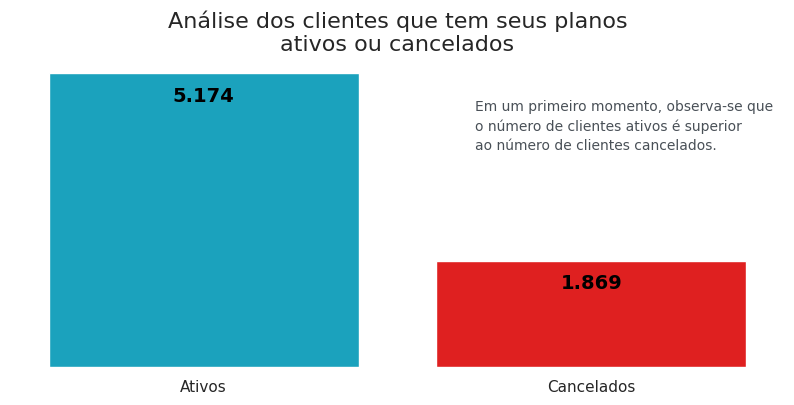

In [15]:
ax = grafico_comparacao('Churn', title = "Análise dos clientes que tem seus planos\nativos ou cancelados", offset = -500, legenda = False)
ax.xaxis.set_major_locator(FixedLocator([0, 1]))
ax.xaxis.set_major_formatter(FixedFormatter(['Ativos', 'Cancelados']))

ax.text(0.7, 3500,
         'Em um primeiro momento, observa-se que\n'
         'o número de clientes ativos é superior\n'
         'ao número de clientes cancelados.\n',
         fontsize=10, linespacing=1.45, color=CINZA2)
plt.show()

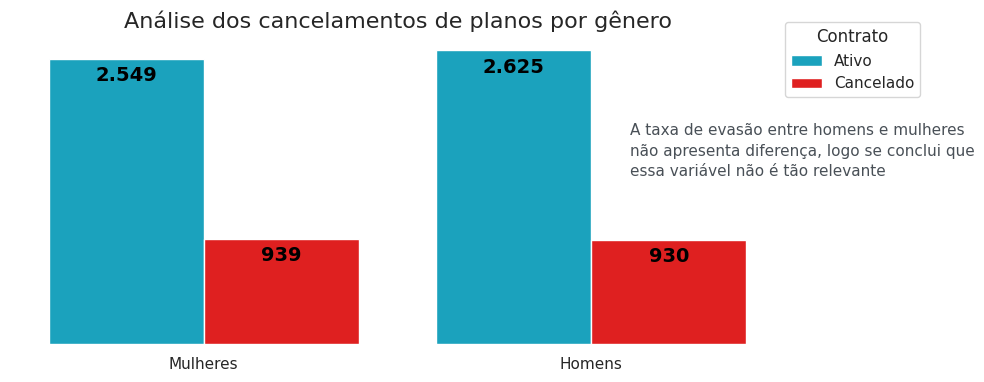

In [16]:
ax = grafico_comparacao('genero', title = "Análise dos cancelamentos de planos por gênero",offset = -200, legenda = True)
ax.xaxis.set_major_locator(FixedLocator([0, 1]))
ax.xaxis.set_major_formatter(FixedFormatter(['Mulheres', 'Homens']))
ax.text(1.1, 1500,
         'A taxa de evasão entre homens e mulheres\n'
         'não apresenta diferença, logo se conclui que\n'
         'essa variável não é tão relevante',
         fontsize=11, linespacing=1.45, color=CINZA2)
plt.show()

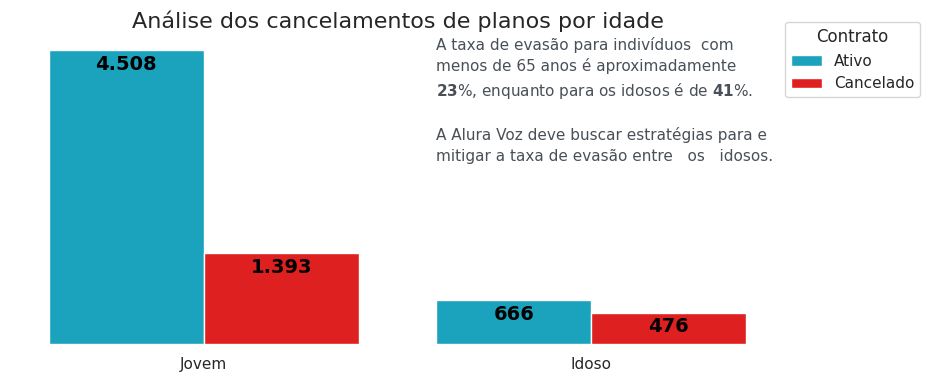

In [17]:
ax = grafico_comparacao('idoso', title = "Análise dos cancelamentos de planos por idade",offset = -300, legenda = True)
ax.xaxis.set_major_locator(FixedLocator([0, 1]))
ax.xaxis.set_major_formatter(FixedFormatter(['Jovem', 'Idoso']))

ax.text(0.6, 2500,
         'A taxa de evasão para indivíduos  com\n'
         'menos de 65 anos é aproximadamente \n'
         '$\\bf{23}$%, enquanto para os idosos é de $\\bf{41}$%.\n'
         '\n'
         'A Alura Voz deve buscar estratégias para e\n'
         'mitigar a taxa de evasão entre   os   idosos.\n'
         ,
         fontsize=11, linespacing=1.45, color=CINZA2)
plt.show()

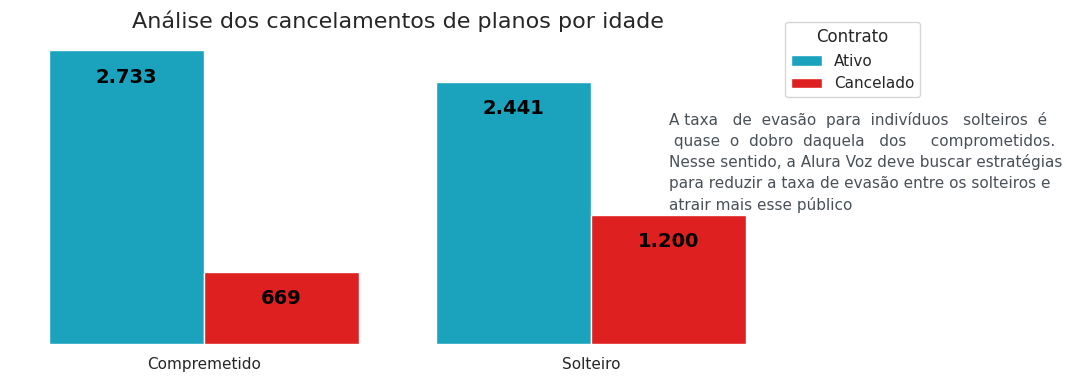

In [18]:
ax = grafico_comparacao('parceiro', title = "Análise dos cancelamentos de planos por idade",offset = -300, legenda = True)

ax.xaxis.set_major_locator(FixedLocator([0, 1]))
ax.xaxis.set_major_formatter(FixedFormatter(['Compremetido', 'Solteiro']))
ax.text(1.2, 1250,
         'A taxa   de  evasão  para  indivíduos   solteiros  é\n '
         'quase  o  dobro  daquela   dos     comprometidos.\n'
         'Nesse sentido, a Alura Voz deve buscar estratégias\n'
         'para reduzir a taxa de evasão entre os solteiros e\n'
         'atrair mais esse público',
         fontsize=11, linespacing=1.45, color=CINZA2)
plt.show()

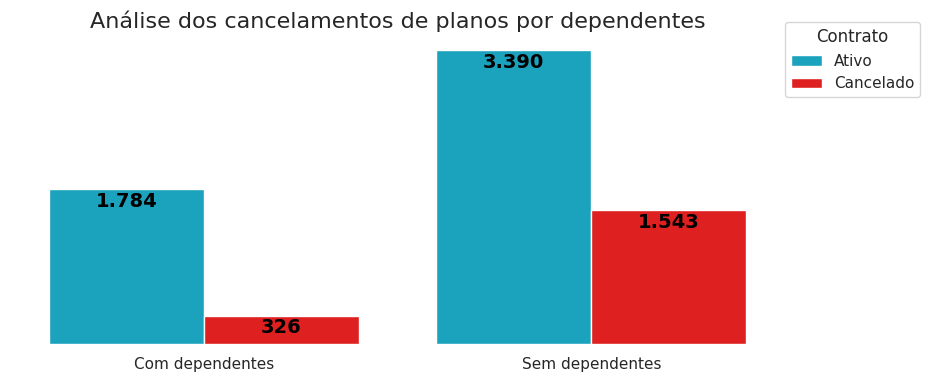

In [19]:
ax = grafico_comparacao('dependentes', title = "Análise dos cancelamentos de planos por dependentes",offset = -200, legenda = True)

ax.xaxis.set_major_locator(FixedLocator([0, 1]))
ax.xaxis.set_major_formatter(FixedFormatter(['Com dependentes', 'Sem dependentes']))

plt.show()

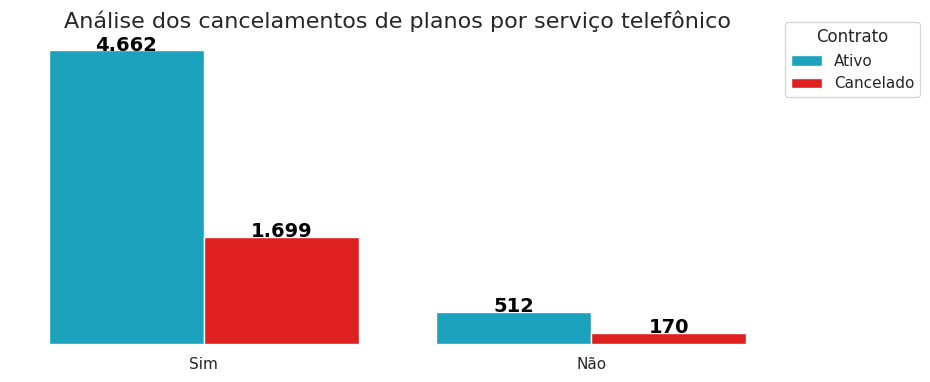

In [20]:
ax = grafico_comparacao('serviço_telefônico', title = "Análise dos cancelamentos de planos por serviço telefônico",offset = 0, legenda = True)


ax.xaxis.set_major_locator(FixedLocator([0, 1]))
ax.xaxis.set_major_formatter(FixedFormatter(['Sim', 'Não']))

plt.show()

In [24]:
print(df.query('serviço_telefônico=="Sim"').Churn.value_counts(normalize = True)[1])
print('\n')
print(df.query('serviço_telefônico=="Nao"').Churn.value_counts(normalize = True)[1])

0.2670963684955196


0.24926686217008798


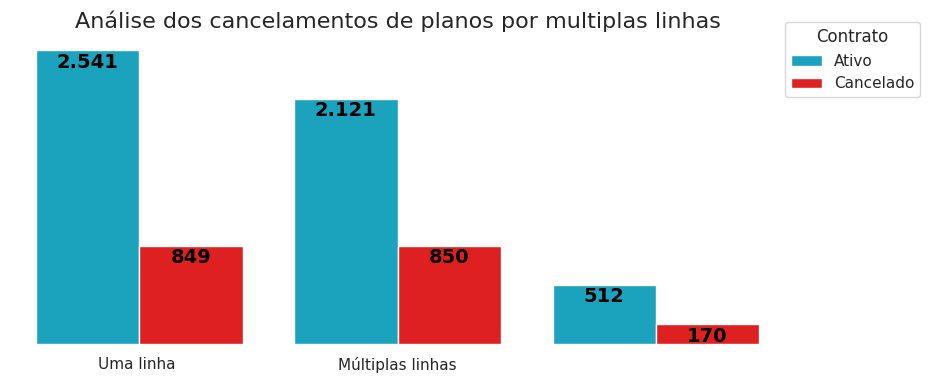

In [25]:
ax = grafico_comparacao('multiplas_linhas',  title = "Análise dos cancelamentos de planos por multiplas linhas",offset = -150, legenda = True)

ax.xaxis.set_major_locator(FixedLocator([0, 1]))
ax.xaxis.set_major_formatter(FixedFormatter(['Uma linha ', 'Múltiplas linhas', "Sem linhas"]))

plt.show()

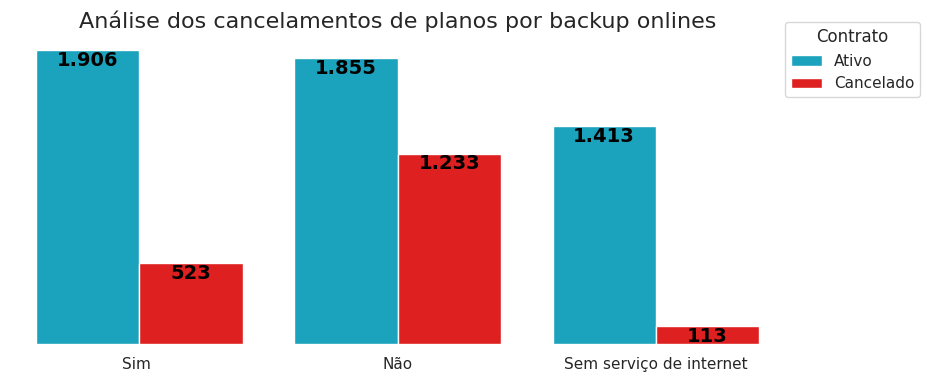

In [26]:
ax = grafico_comparacao('backup_online', title = "Análise dos cancelamentos de planos por backup onlines",offset = -100, legenda = True)

ax.xaxis.set_major_locator(FixedLocator([0, 1, 2]))
ax.xaxis.set_major_formatter(FixedFormatter(['Sim ', 'Não', "Sem serviço de internet"]))
plt.show()

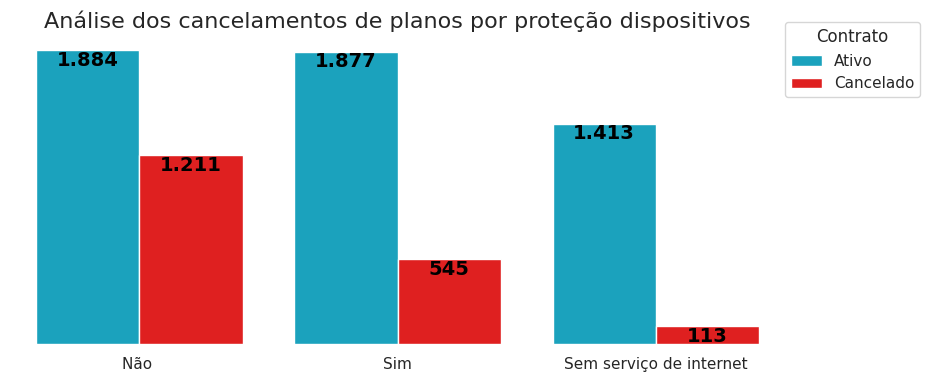

In [27]:
ax = grafico_comparacao('proteção_dispositivos', title = "Análise dos cancelamentos de planos por proteção dispositivos",offset = -100, legenda = True)

ax.xaxis.set_major_locator(FixedLocator([0, 1, 2]))
ax.xaxis.set_major_formatter(FixedFormatter(['Não ', 'Sim', "Sem serviço de internet"]))

plt.show()

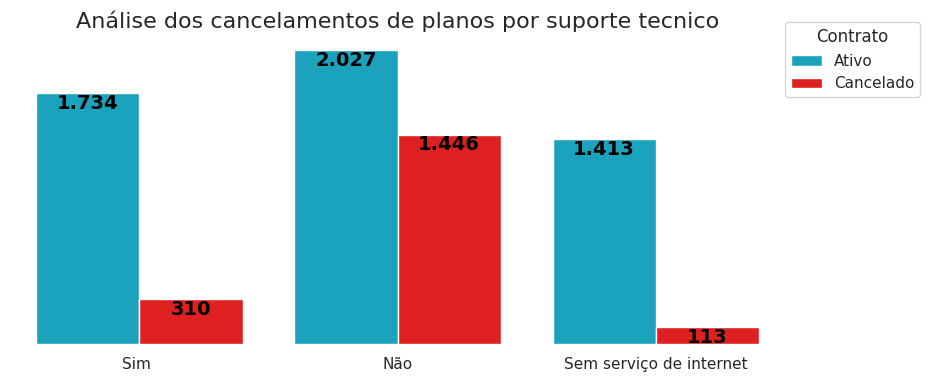

In [28]:
ax = grafico_comparacao('suporte_tecnico', title = "Análise dos cancelamentos de planos por suporte tecnico",offset = -110, legenda = True)

ax.xaxis.set_major_locator(FixedLocator([0, 1, 2]))
ax.xaxis.set_major_formatter(FixedFormatter(['Sim ', 'Não', "Sem serviço de internet"]))
plt.show()

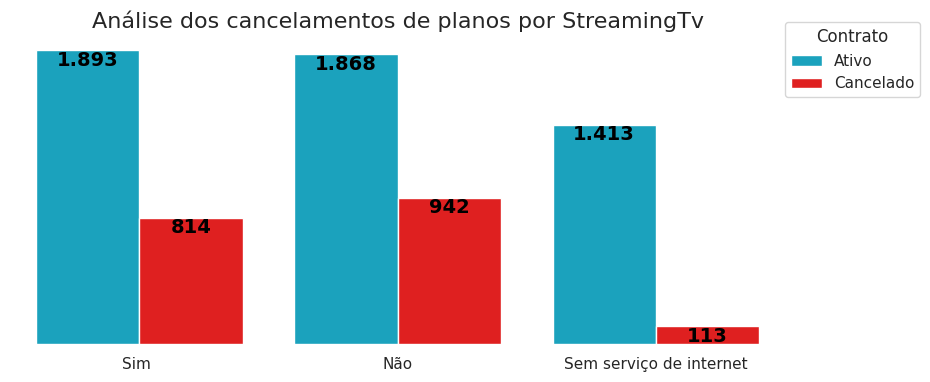

In [29]:
ax = grafico_comparacao('streaming_tv', title = "Análise dos cancelamentos de planos por StreamingTv",offset = -100, legenda = True)
ax.xaxis.set_major_locator(FixedLocator([0, 1, 2]))
ax.xaxis.set_major_formatter(FixedFormatter(['Sim ', 'Não', "Sem serviço de internet"]))
plt.show()

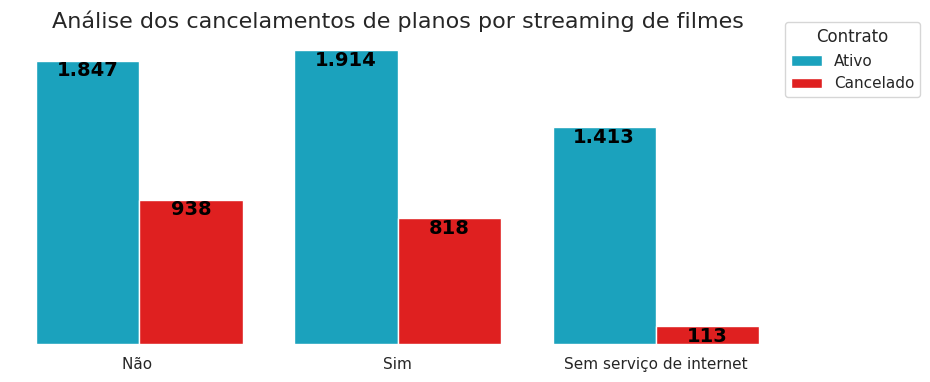

In [30]:
ax = grafico_comparacao('streaming_filmes', title = "Análise dos cancelamentos de planos por streaming de filmes",offset = -100, legenda = True)

ax.xaxis.set_major_locator(FixedLocator([0, 1, 2]))
ax.xaxis.set_major_formatter(FixedFormatter(['Não ', 'Sim', "Sem serviço de internet"]))

plt.show()

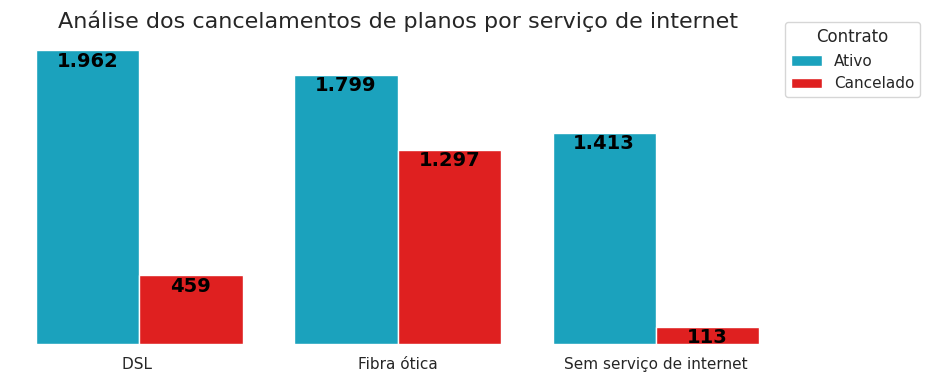

In [31]:
ax = grafico_comparacao('serviço_internet', title = "Análise dos cancelamentos de planos por serviço de internet",offset = -110, legenda = True)

ax.xaxis.set_major_locator(FixedLocator([0, 1, 2]))
ax.xaxis.set_major_formatter(FixedFormatter(['DSL ', 'Fibra ótica', "Sem serviço de internet"]))
plt.show()

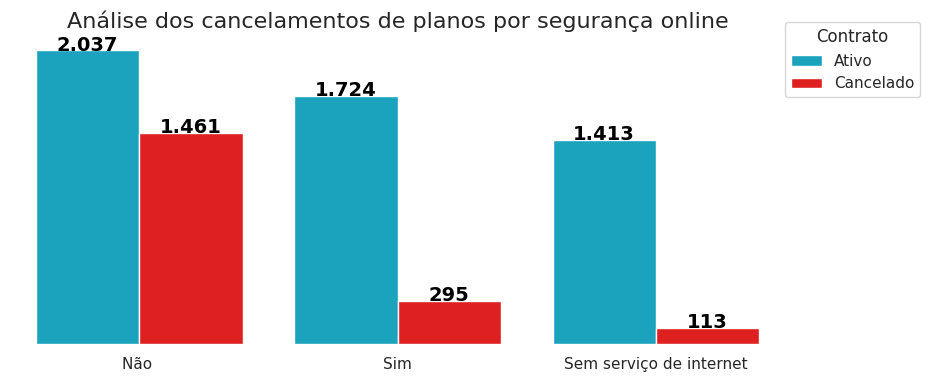

In [32]:
ax = grafico_comparacao('segurança_online', title = "Análise dos cancelamentos de planos por segurança online", legenda = True)
ax.xaxis.set_major_locator(FixedLocator([0, 1, 2]))
ax.xaxis.set_major_formatter(FixedFormatter(['Não ', 'Sim', "Sem serviço de internet"]))

plt.show()

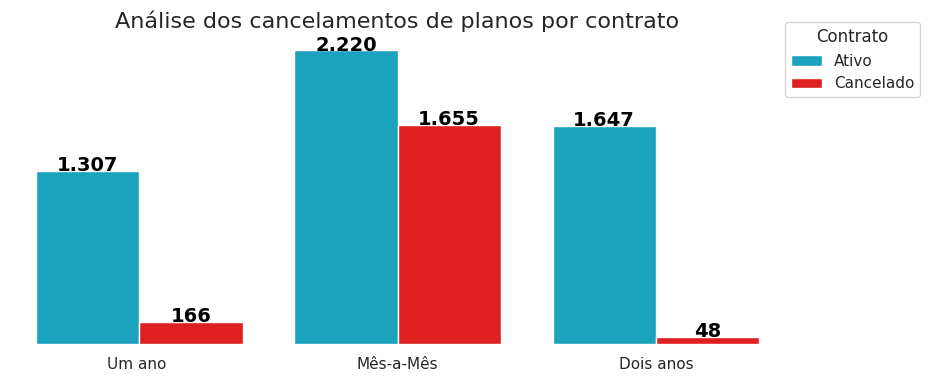

In [33]:
ax = grafico_comparacao('contrato', title = "Análise dos cancelamentos de planos por contrato",offset = 0, legenda = True)

ax.xaxis.set_major_locator(FixedLocator([0, 1, 2]))
ax.xaxis.set_major_formatter(FixedFormatter(['Um ano ', 'Mês-a-Mês', "Dois anos"]))
plt.show()

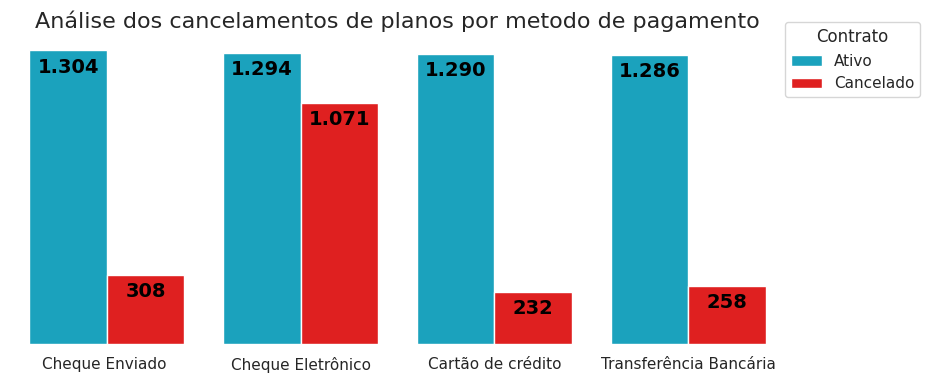

In [34]:
ax = grafico_comparacao('metodo_pagamento', title = "Análise dos cancelamentos de planos por metodo de pagamento",offset = -100, legenda = True)

ax.xaxis.set_major_locator(FixedLocator([0, 1, 2, 3]))
ax.xaxis.set_major_formatter(FixedFormatter(['Cheque Enviado ', 'Cheque Eletrônico', "Cartão de crédito", "Transferência Bancária"]))
plt.show()

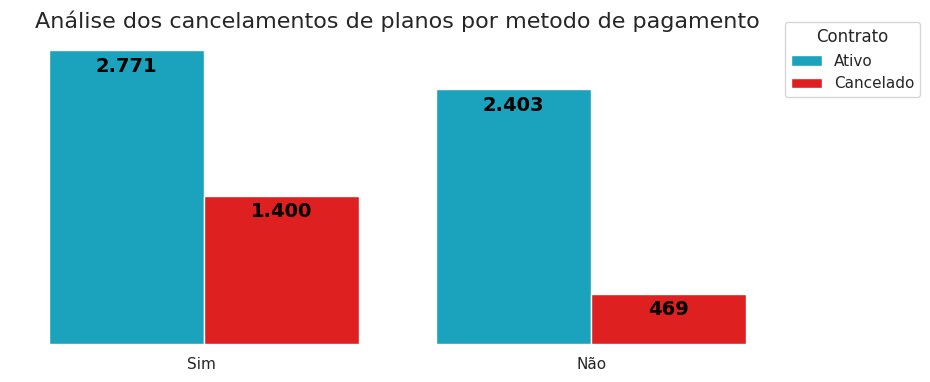

In [35]:
ax = grafico_comparacao('faturamento_sem_papel', title = "Análise dos cancelamentos de planos por metodo de pagamento",offset = -200, legenda = True)

ax.xaxis.set_major_locator(FixedLocator([0, 1]))
ax.xaxis.set_major_formatter(FixedFormatter(['Sim ', 'Não']))
plt.show()

Percebemos também que as variáveis 'multiplas_linhas', 'streaming_filmes' e 'streaming_tv' não têm um impacto significativo. No entanto, as seguintes variáveis demonstram ter influência em suas taxas de evasão:

* Dependentes: Indivíduos sem dependentes apresentam uma taxa de evasão maior.
Serviço telefônico: Clientes sem linha telefônica têm uma taxa de evasão superior.
* Serviço de internet: Aqueles com fibra ótica como serviço de internet tendem a ter uma taxa de evasão mais elevada. A Alura Voz pode direcionar esforços para atrair clientes para o serviço DSL.
* Backup online: A ausência de backup online está associada a uma maior taxa de evasão.
* Proteção de dispositivos: Indivíduos sem proteção de dispositivos apresentam uma taxa de evasão superior.
* Suporte técnico: A falta de suporte técnico está relacionada a uma maior taxa de evasão.
* Segurança online: A ausência de segurança online está associada a uma maior taxa de evasão.
* Faturamento sem papel: Clientes com faturamento sem papel têm uma taxa de evasão superior.
* Método de pagamento: Aqueles que utilizam cheque eletrônico como método de pagamento tendem a ter uma taxa de evasão mais elevada.
* Contrato: Clientes com contratos do tipo mês a mês apresentam uma taxa de evasão maior. A Alura Voz pode incentivar a adesão a planos anuais como estratégia para reduzir a evasão.






Podemos observar que as variáveis **'Backup online'**,  **'Proteção de dispositivos'**,  **'Suporte técnico'**  e  **'Segurança online'**  têm um impacto negativo quando os clientes não possuem esses serviços. Para contextualizar, aproximadamente **38%** dos planos cancelados referem-se a situações em que os clientes não possuíam nenhum desses benefícios. Em contrapartida, apenas **1%** dos planos cancelados ocorreram quando os clientes tinham todos esses serviços.

In [39]:
churn = df.copy()
churn = churn.query('Churn=="Sim"')
ativo = df.copy()
ativo =ativo.query('Churn=="Nao"')

In [40]:
percent = (len(churn.query('backup_online=="Nao" and proteção_dispositivos=="Nao" and suporte_tecnico=="Nao" and segurança_online =="Nao"'))/len(churn))*100
print(f'{percent:.2f}%')

38.42%


In [41]:
percent = (len(churn.query('backup_online=="Sim" and proteção_dispositivos=="Sim" and suporte_tecnico=="Sim" and segurança_online =="Sim"'))/len(churn))*100
print(f'{percent:.2f}%')

1.34%


##<font color='green'>**Analisando graficamente as variáveis do tipo numéricas**</font>

In [43]:
df.columns

Index(['clienteID', 'Churn', 'genero', 'idoso', 'parceiro', 'dependentes',
       'meses_contrato', 'serviço_telefônico', 'multiplas_linhas',
       'serviço_internet', 'segurança_online', 'backup_online',
       'proteção_dispositivos', 'suporte_tecnico', 'streaming_tv',
       'streaming_filmes', 'contrato', 'faturamento_sem_papel',
       'metodo_pagamento', 'custos_mensais', 'custos_totais'],
      dtype='object')

In [44]:
fig = px.box(data_frame=df, x='meses_contrato', y='Churn', color='Churn', color_discrete_sequence=[AZUL2, VERMELHO1],
             labels={"Churn": 'Status'})
fig.update_layout(font_family = 'DejaVu Sans', font_size=15,
                  font_color= CINZA2, title_font_color= CINZA1, title_font_size=24,
                  title_text='BoxPlot de Churn por meses de contrato' +
                             '<br><sup size=1 style="color:#555655">Ativos ou Cancelados</sup>',
                  xaxis_title='', yaxis_title='', plot_bgcolor= CINZA5)
# Alterando os rótulos do eixo de legendas
fig.for_each_trace(lambda t: t.update(name="Ativo" if t.name == "No" else "Cancelado" if t.name == "Yes" else t.name))
# Ajustando o eixo x com os labels dos trimestres
fig.update_xaxes(ticksuffix=" meses")
fig.update_yaxes(ticktext = ['Ativo', 'Cancelado'], tickvals=["No", "Yes"])
fig.update_layout(hovermode="closest")

fig.show()

In [45]:
fig = px.box(data_frame=df, x='custos_mensais', y='Churn', color='Churn', color_discrete_sequence=[AZUL2, VERMELHO1],
             labels={"Churn": 'Status'})
fig.update_layout(font_family = 'DejaVu Sans', font_size=15,
                  font_color= CINZA2, title_font_color= CINZA1, title_font_size=24,
                  title_text='BoxPlot de Churn por custos mensais' +
                             '<br><sup size=1 style="color:#555655">Ativos ou Cancelados</sup>',
                  xaxis_title='', yaxis_title='', plot_bgcolor= CINZA5)
# Alterando os rótulos do eixo de legendas
fig.for_each_trace(lambda t: t.update(name="Ativo" if t.name == "No" else "Cancelado" if t.name == "Yes" else t.name))
# Ajustando o eixo x com os labels dos trimestres
fig.update_xaxes(tickprefix="R$ ")
fig.update_yaxes(ticktext = ['Ativo', 'Cancelado'], tickvals=["No", "Yes"])


fig.show()



Percebe-se que os clientes que permanecem por mais tempo na Alura Voz têm uma tendência a manter o serviço, enquanto aqueles com planos mais econômicos tendem a abandoná-lo.